In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import graphviz
from sklearn.decomposition import PCA

In [2]:
path_features = 'C:\\Belgium test Project\\Rerun Dataset\\Features\\features.csv'
path_features_MAT = 'C:\\Belgium test Project\\Features from MATLAB\\post_pro_input.csv'
path_spy_label = 'C:\\Belgium test Project\\Rerun Dataset\\Label\\Label.csv'

In [3]:
features = pd.read_csv(path_features)
py_label = pd.read_csv(path_spy_label)
input_py = features.merge(py_label,left_index = True,right_index=True)

input_MAT = pd.read_csv(path_features_MAT)
Lab_MAT = input_MAT['Label'].to_numpy()
Class = []
for l in range(len(Lab_MAT)):
    if Lab_MAT[l] == 1:
        Class.append('Mitosis')
    if Lab_MAT[l] == 0:
        Class.append('Normal')
pd_class = pd.DataFrame({'Class':Class})

mod_input_MAT = input_MAT.merge(pd_class,left_index = True,right_index=True)

In [4]:
input_py.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 69 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Closed Euclidean distance from neighbor  327 non-null    float64
 1   Area of mother cell                      327 non-null    int64  
 2   Major axis of mother cell                327 non-null    float64
 3   Minor axis of mother cell                327 non-null    float64
 4   Circularity of mother cell               327 non-null    float64
 5   Mean intensity of mother cell            327 non-null    float64
 6   Max intensity of mother cell             327 non-null    float64
 7   Min intensity of mother cell             327 non-null    float64
 8   Area of daughter cell                    327 non-null    int64  
 9   Major axis of daughter cell              327 non-null    float64
 10  Minor axis of daughter cell              327 non-n

In [5]:
input_py.describe()

Closed Euclidean distance from neighbor  Area of mother cell  \
count                               327.000000           327.000000   
mean                                164.124285           155.266055   
std                                 241.161679           139.627263   
min                                   8.478665             9.000000   
25%                                  18.919649            70.000000   
50%                                  26.621542           132.000000   
75%                                 257.562989           200.500000   
max                                1370.153499          1432.000000   

       Major axis of mother cell  Minor axis of mother cell  \
count                 327.000000                 327.000000   
mean                   18.032388                  10.907397   
std                     8.046873                   4.615547   
min                     4.017191                   2.890676   
25%                    12.907422                   7.853868   
50%                    15.881127                  10.797281   
75%                    21.252003                  13.419690   
max                    48.609807                  43.430115   

       Circularity of mother cell  Mean intensity of mother cell  \
count                  327.000000                     327.000000   
mean                     0.721294                       0.524578   
std                      0.184517                       0.130294   
min                      0.082127                       0.279984   
25%                      0.599504                       0.409268   
50%                      0.756523                       0.508856   
75%                      0.875599                       0.648106   
max                      0.967665                       0.733334   

       Max intensity of mother cell  Min intensity of mother cell  \
count                    327.000000                    327.000000   
mean                       0.798701                      0.230874   
std                        0.098870                      0.243694   
min                        0.723407                      0.004702   
25%                        0.746357                      0.029927   
50%                        0.749288                      0.101640   
75%                        0.791756                      0.478207   
max                        1.127301                      0.709529   

       Area of daughter cell  Major axis of daughter cell  ...  \
count             327.000000                   327.000000  ...   
mean              127.262997                    15.952326  ...   
std               128.922569                     6.963386  ...   
min                21.000000                     5.644527  ...   
25%                59.000000                    11.346941  ...   
50%               106.000000                    14.832407  ...   
75%               158.500000                    17.978496  ...   
max              1426.000000                    52.563135  ...   

       Maximum of Euclidean distance  Variance of Euclidean distance  \
count                     327.000000                      327.000000   
mean                       13.581329                       36.731881   
std                        10.033078                       61.958216   
min                         0.494436                        0.000100   
25%                         5.736260                        2.511732   
50%                        10.349166                        9.853608   
75%                        19.879593                       43.571079   
max                        48.324429                      429.078049   

       Mean of Euclidean distance  Range of Euclidean distance  \
count                  327.000000                   327.000000   
mean                     5.686909                    11.916719   
std                      4.449150                     9.809739   
min                      0.222437                     0.

In [6]:
mod_input_MAT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 53 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Closed Euclidean distance from neighbor  244 non-null    float64
 1   Area of mother cell                      244 non-null    int64  
 2   Major axis of mother cell                244 non-null    float64
 3   Minor axis of mother cell                244 non-null    float64
 4   Circularity of mother cell               244 non-null    float64
 5   Mean intensity of mother cell            244 non-null    float64
 6   Area of daughter cell                    244 non-null    int64  
 7   Major axis of daughter cell              244 non-null    float64
 8   Minor axis of daughter cell              244 non-null    float64
 9   Circularity of daughter cell             244 non-null    float64
 10  Mean intensity of daughter cell          244 non-n

In [7]:
mod_input_MAT.describe()

Closed Euclidean distance from neighbor  Area of mother cell  \
count                               244.000000           244.000000   
mean                                 52.993442           122.987705   
std                                 141.911181            98.182264   
min                                   1.490712             1.000000   
25%                                   7.714816            34.000000   
50%                                  12.296200           105.500000   
75%                                  19.545510           179.000000   
max                                1292.409000           433.000000   

       Major axis of mother cell  Minor axis of mother cell  \
count                 244.000000                 244.000000   
mean                   15.362688                  15.362688   
std                     7.432906                   7.432906   
min                     1.154701                   1.154701   
25%                    10.617505                  10.617505   
50%                    15.070645                  15.070645   
75%                    20.207025                  20.207025   
max                    37.989510                  37.989510   

       Circularity of mother cell  Mean intensity of mother cell  \
count                  244.000000                     244.000000   
mean                     1.047217                       0.554554   
std                      1.088351                       0.189400   
min                      0.109163                       0.275288   
25%                      0.605395                       0.397656   
50%                      0.932730                       0.540363   
75%                      1.070608                       0.663678   
max                      6.542259                       1.141194   

       Area of daughter cell  Major axis of daughter cell  \
count             244.000000                   244.000000   
mean               78.245902                    11.792134   
std                66.821710                     6.357791   
min                 1.000000                     1.154701   
25%                24.750000                     8.288569   
50%                63.000000                    12.224650   
75%               129.000000                    15.240520   
max               405.000000                    37.702100   

       Minor axis of daughter cell  Circularity of daughter cell  ...  \
count                   244.000000                    244.000000  ...   
mean                     11.792134                      1.146387  ...   
std                       6.357791                      1.055180  ...   
min                       1.154701                      0.179839  ...   
25%                       8.288569                      0.708894  ...   
50%                      12.224650                      1.030375  ...   
75%                      15.240520                      1.141064  ...   
max                      37.702100                      6.542259  ...   

       Minimum of Euclidean distance  Mean of Euclidean distance  \
count                     244.000000                  244.000000   
mean                        1.387596                    0.123460   
std                         1.328589                    0.078562   
min                         0.012502                    0.003087   
25%                         0.527684                    0.065525   
50%                         1.020876                    0.110129   
75%                         1.803257                    0.165465   
max                         8.854121                    0.392855   

       Variance of Euclidean distance  Range of Euclidean distance  \
count                      244.000000                   244.000000   
mean                         1.301999                     9.838794   
std                          1.830512                     8.666564   
min                          0.001179                     0.191411   
25%            

In [8]:
mod_input_MAT

Closed Euclidean distance from neighbor  Area of mother cell  \
0                                  12.373330                  254   
1                                  10.065230                  273   
2                                  28.764850                  158   
3                                  22.089170                   76   
4                                  55.684140                   32   
..                                       ...                  ...   
239                                16.311850                   22   
240                                 7.780798                    2   
241                                 8.110647                   68   
242                                 4.482471                   74   
243                                 8.700252                    2   

     Major axis of mother cell  Minor axis of mother cell  \
0                    22.202460                  22.202460   
1                    37.802390                  37.802390   
2                    15.213370                  15.213370   
3                    22.930390                  22.930390   
4                     8.984061                   8.984061   
..                         ...                        ...   
239                   8.779675                   8.779675   
240                   2.309401                   2.309401   
241                  23.628850                  23.628850   
242                  17.960630                  17.960630   
243                   2.309401                   2.309401   

     Circularity of mother cell  Mean intensity of mother cell  \
0                      1.011624                       0.335856   
1                      0.369938                       0.392120   
2                      0.898511                       0.341194   
3                      0.232656                       0.668895   
4                      0.873743                       0.655033   
..                          ...                            ...   
239                    0.707612                       0.862353   
240                    6.542259                       0.608598   
241                    0.403852                       0.781495   
242                    0.178231                       0.570223   
243                    6.542259                       0.976644   

     Area of daughter cell  Major axis of daughter cell  \
0                      125                    13.670200   
1                       56                    11.241600   
2                       34                     8.143830   
3                      106                    18.845600   
4                      195                    20.398730   
..                     ...                          ...   
239                      6                     4.760952   
240                     14                    11.932220   
241                     13                     9.542863   
242                     30                    12.458570   
243                     41                     8.622728   

     Minor axis of daughter cell  Circularity of daughter cell  ...  \
0                      13.670200                      1.108364  ...   
1                      11.241600                      0.840874  ...   
2                       8.143830                      1.092697  ...   
3                      18.845600                      0.637073  ...   
4                      20.398730                      0.699625  ...   
..                           ...                           ...  ...   
239                     4.760952                      1.087126  ...   
240                    11.932220                      0.330669  ...   
241                     9.542863                      0.621096  ...   
242                    12.458570                      0.380709  ...   
243                     8.622728                      0.777335  ...   

     Mean of Euclidean distance  Variance of Euclidean distance  \
0                    

Text(0.5, 1.0, 'The path process by MATLAB programming')

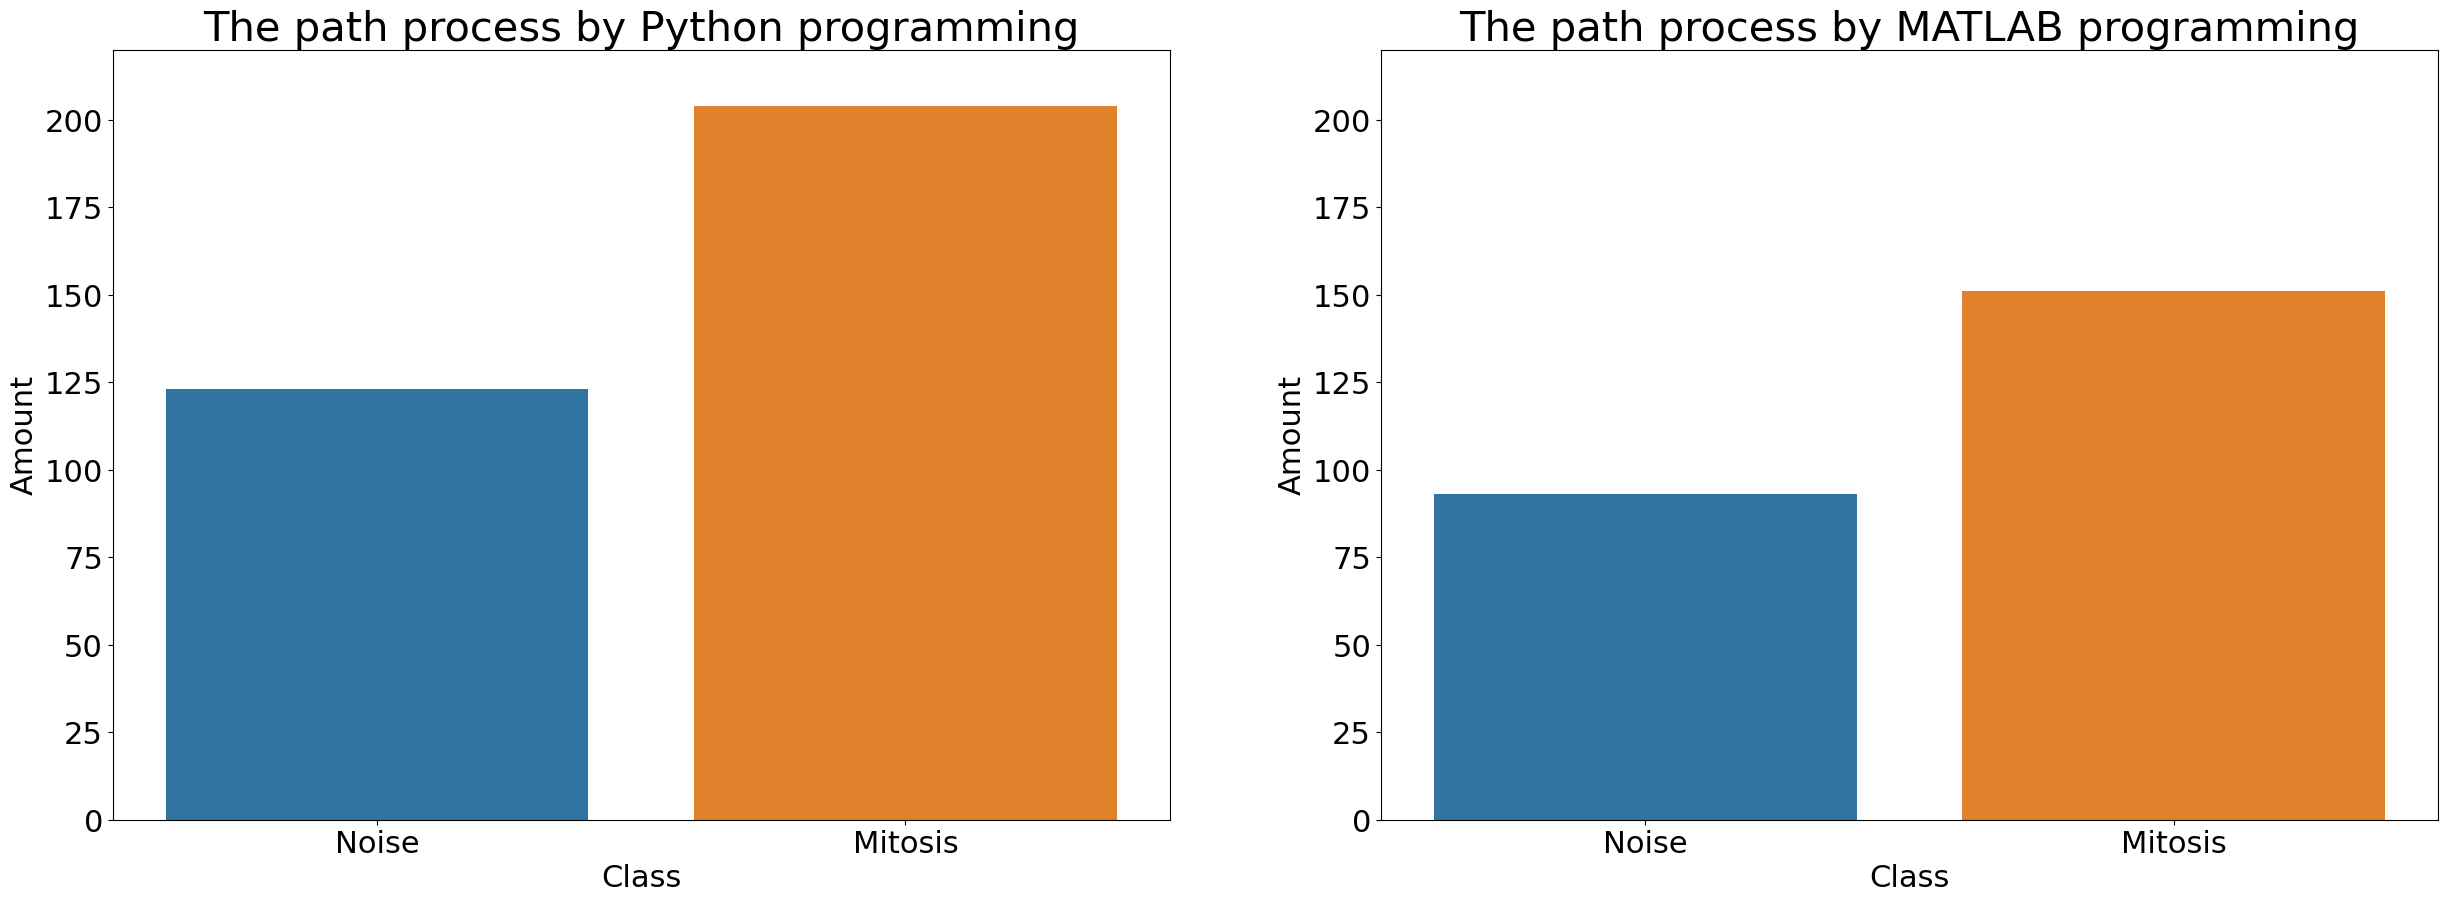

In [9]:
# PY class wise amount
Lab_PY = input_py['Label'].to_numpy()
Lab_py_norm = len(Lab_PY[Lab_PY == 0])
Lab_py_mito = len(Lab_PY[Lab_PY == 1])

PY_amount = pd.DataFrame({'Amount':[Lab_py_norm,Lab_py_mito],'Class' : ['Noise','Mitosis']})
# MAT class wise amount
Lab_MAT_norm = len(Lab_MAT[Lab_MAT == 0])
Lab_MAT_mito = len(Lab_MAT[Lab_MAT == 1])
MAT_amount = pd.DataFrame({'Amount':[Lab_MAT_norm,Lab_MAT_mito],'Class' : ['Noise','Mitosis']})

plt.figure(figsize = (30,10))
plt.rcParams.update({'font.size': 22})
plt.subplot(1,2,1)
ax = sns.barplot(x = 'Class', y = 'Amount', data = PY_amount)
ax.set(ylim=(0,220))
plt.title('The path process by Python programming',fontsize = 30)
plt.subplot(1,2,2)
ax = sns.barplot(x = 'Class', y = 'Amount', data = MAT_amount)
ax.set(ylim=(0,220))
plt.title('The path process by MATLAB programming',fontsize = 30)

In [10]:
input_py

Closed Euclidean distance from neighbor  Area of mother cell  \
0                                  15.753674                  282   
1                                  22.754893                  131   
2                                 190.126017                  337   
3                                  28.772781                  173   
4                                  12.434111                  259   
..                                       ...                  ...   
322                                17.725281                   26   
323                                24.197661                  165   
324                                26.151949                   38   
325                               299.442166                  136   
326                                24.289907                   22   

     Major axis of mother cell  Minor axis of mother cell  \
0                    30.086637                  14.839499   
1                    14.747639                  12.895743   
2                    21.602622                  20.035854   
3                    15.791779                  14.391918   
4                    22.150930                  14.941267   
..                         ...                        ...   
322                   7.092437                   4.960704   
323                  17.439062                  14.677928   
324                  11.893976                   4.671637   
325                  16.346814                  10.661739   
326                   9.156589                   3.414821   

     Circularity of mother cell  Mean intensity of mother cell  \
0                      0.869901                       0.671435   
1                      0.485156                       0.709226   
2                      0.373889                       0.609597   
3                      0.411621                       0.374222   
4                      0.738256                       0.343454   
..                          ...                            ...   
322                    0.714696                       0.625602   
323                    0.539993                       0.595164   
324                    0.919635                       0.594589   
325                    0.758029                       0.486897   
326                    0.927857                       0.656021   

     Max intensity of mother cell  Min intensity of mother cell  \
0                        0.763819                      0.518093   
1                        0.762881                      0.631514   
2                        0.986479                      0.112780   
3                        0.740900                      0.007546   
4                        0.850694                      0.033636   
..                            ...                           ...   
322                      0.742969                      0.488861   
323                      0.815945                      0.241972   
324                      0.734917                      0.332355   
325                      0.746489                      0.228049   
326                      0.737645                      0.526976   

     Area of daughter cell  Major axis of daughter cell  ...  \
0                      625                    37.529135  ...   
1                      132                    16.522120  ...   
2                      376                    39.342817  ...   
3                      201                    19.417690  ...   
4                      116                    14.055735  ...   
..                     ...                          ...  ...   
322                     23                     6.610781  ...   
323                    167                    17.787370  ...   
324                     54                    11.338662  ...   
325                    221                    17.972059  ...   
326                     23                     9.574750  ...   

     Variance of Euclidean distance  Mean of Euclidean distance  \
0        

In [11]:
print('The amount of detected mitotic path from Python is ' + str(Lab_py_mito))

The amount of detected mitotic path from Python is 204


In [12]:
print('The amount of detected mitotic path from MATLAB is ' + str(Lab_MAT_mito))

The amount of detected mitotic path from MATLAB is 151


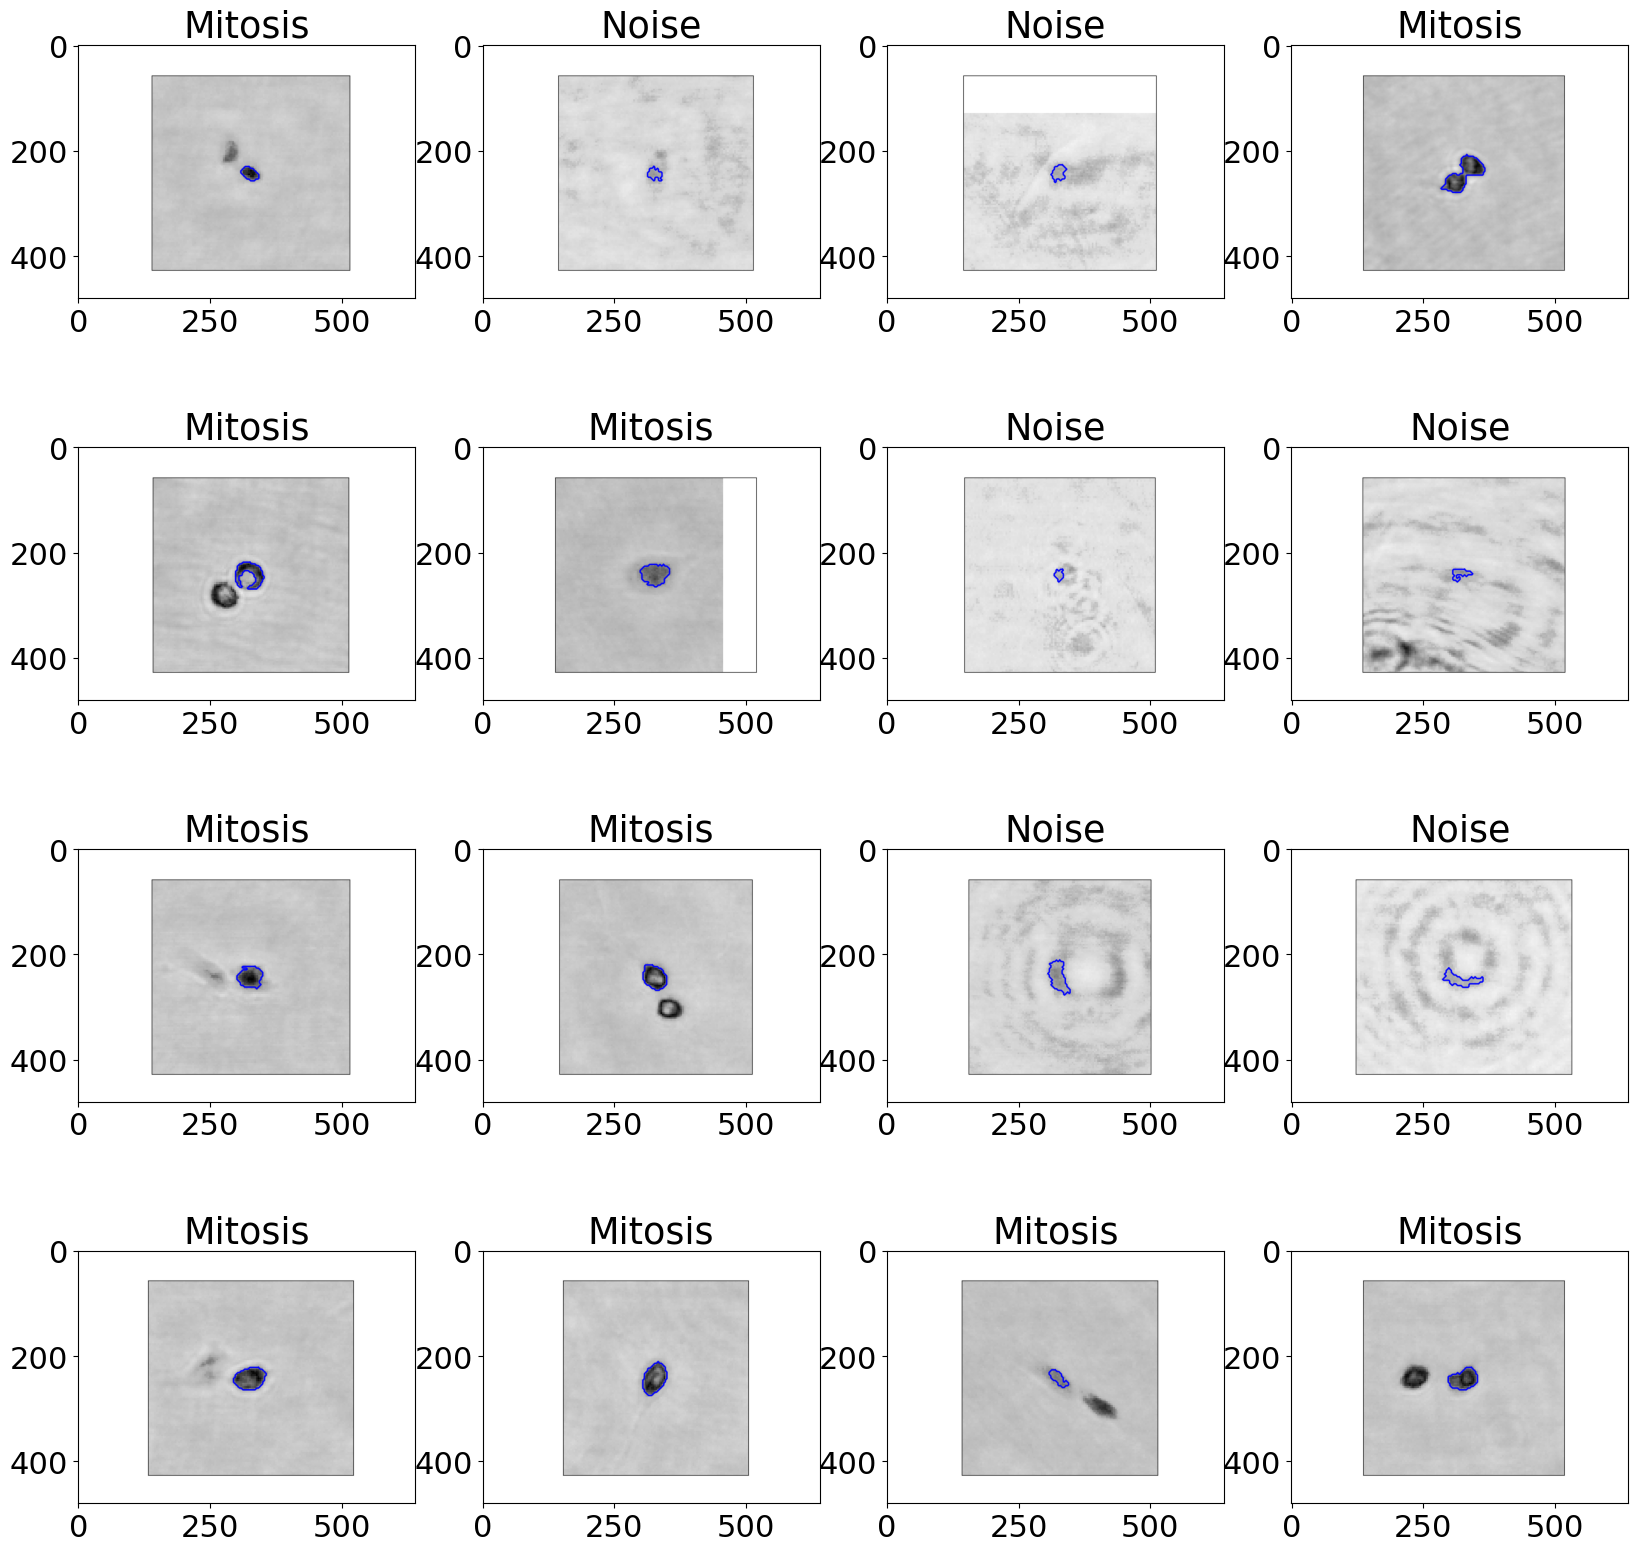

In [13]:
path_detected_frame = 'C:\\Belgium test Project\\Rerun Dataset\\Detected Mitotic frame\\'
en = os.listdir(path_detected_frame)
rand_ind = np.random.randint(0,len(en),size = 16)
lab_title = input_py['Label'].to_list()
plt.figure(figsize = (20,20))

for p in range(16):
    plt.subplot(4,4,p+1)
    im = cv2.imread(path_detected_frame + en[rand_ind[p]],-1)
    plt.imshow(im)
    if lab_title[rand_ind[p]] == 1:
        plt.title('Mitosis')
    if lab_title[rand_ind[p]] == 0:
        plt.title('Noise')

In [14]:
features_py = input_py.drop(columns = ['Label','Class']).to_numpy()
Label = input_py['Label'].to_numpy()
Class = input_py['Class']

In [15]:
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [16]:
Tree = tree.DecisionTreeClassifier(max_depth = 3)
Tree_py = Tree.fit(features_py,Label)

In [17]:
dot_data = tree.export_graphviz(Tree_py, out_file=None, 
                      feature_names=features.columns,
                      class_names=Class.unique(),
                      filled=True, rounded=True,  
                      special_characters=True)  
graph_py = graphviz.Source(dot_data)
plt.figure(figsize = (20,20))
graph_py

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

<Figure size 2000x2000 with 0 Axes>

<AxesSubplot:xlabel='Mean intensity of daughter cell', ylabel='Min intensity of daughter cell (phase)'>

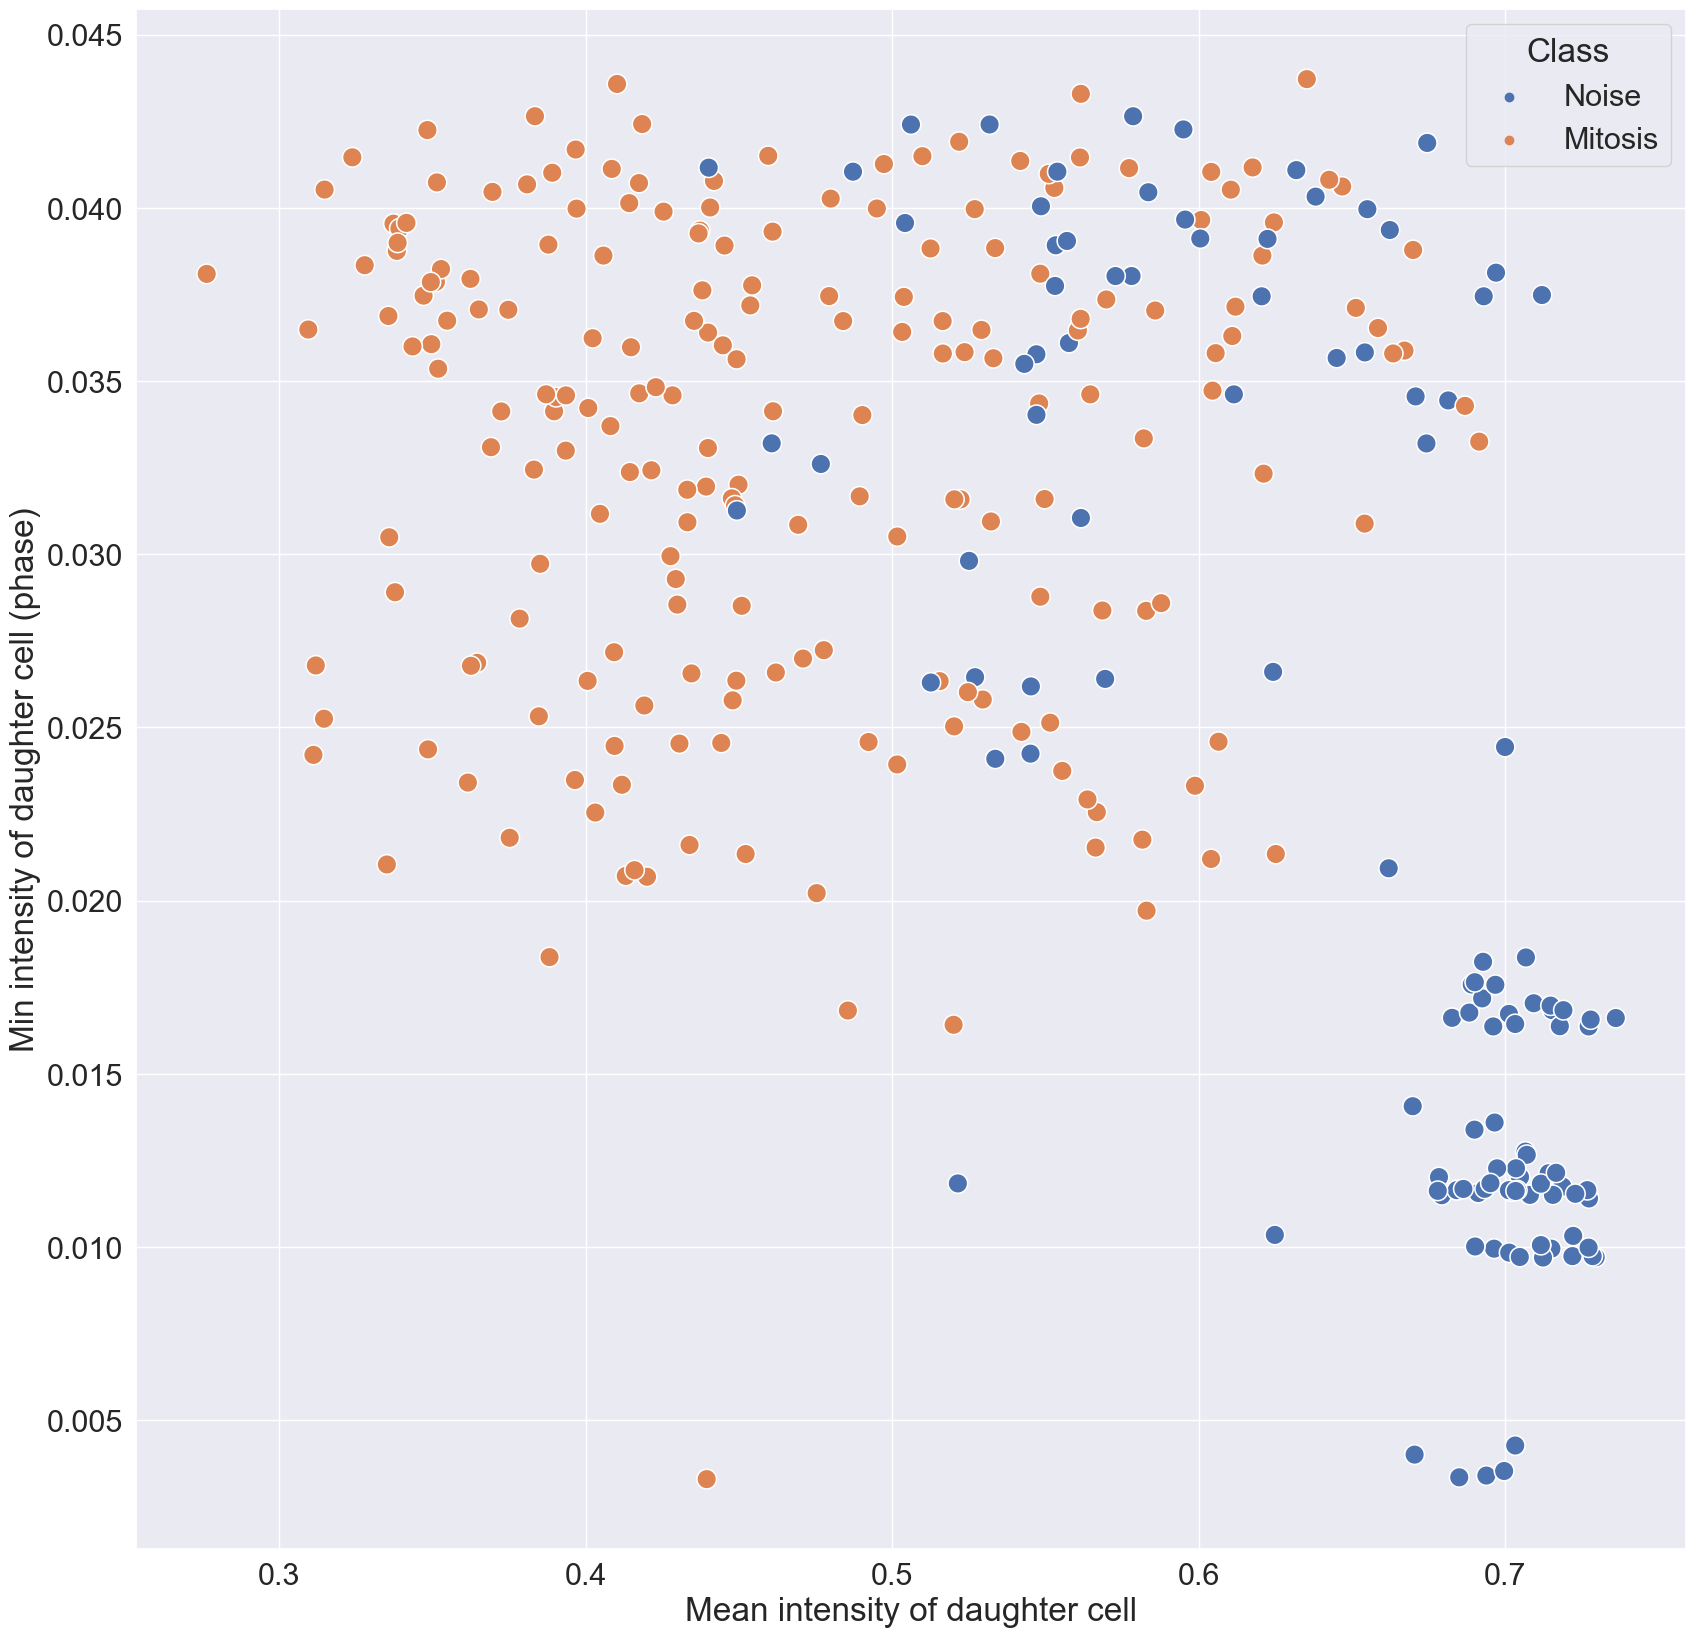

In [18]:
plt.figure(figsize = (20,20))
sns.set(font_scale=2)
sns.scatterplot(data = input_py, x = 'Mean intensity of daughter cell', 
                y = 'Min intensity of daughter cell (phase)', hue = 'Class', s = 200)

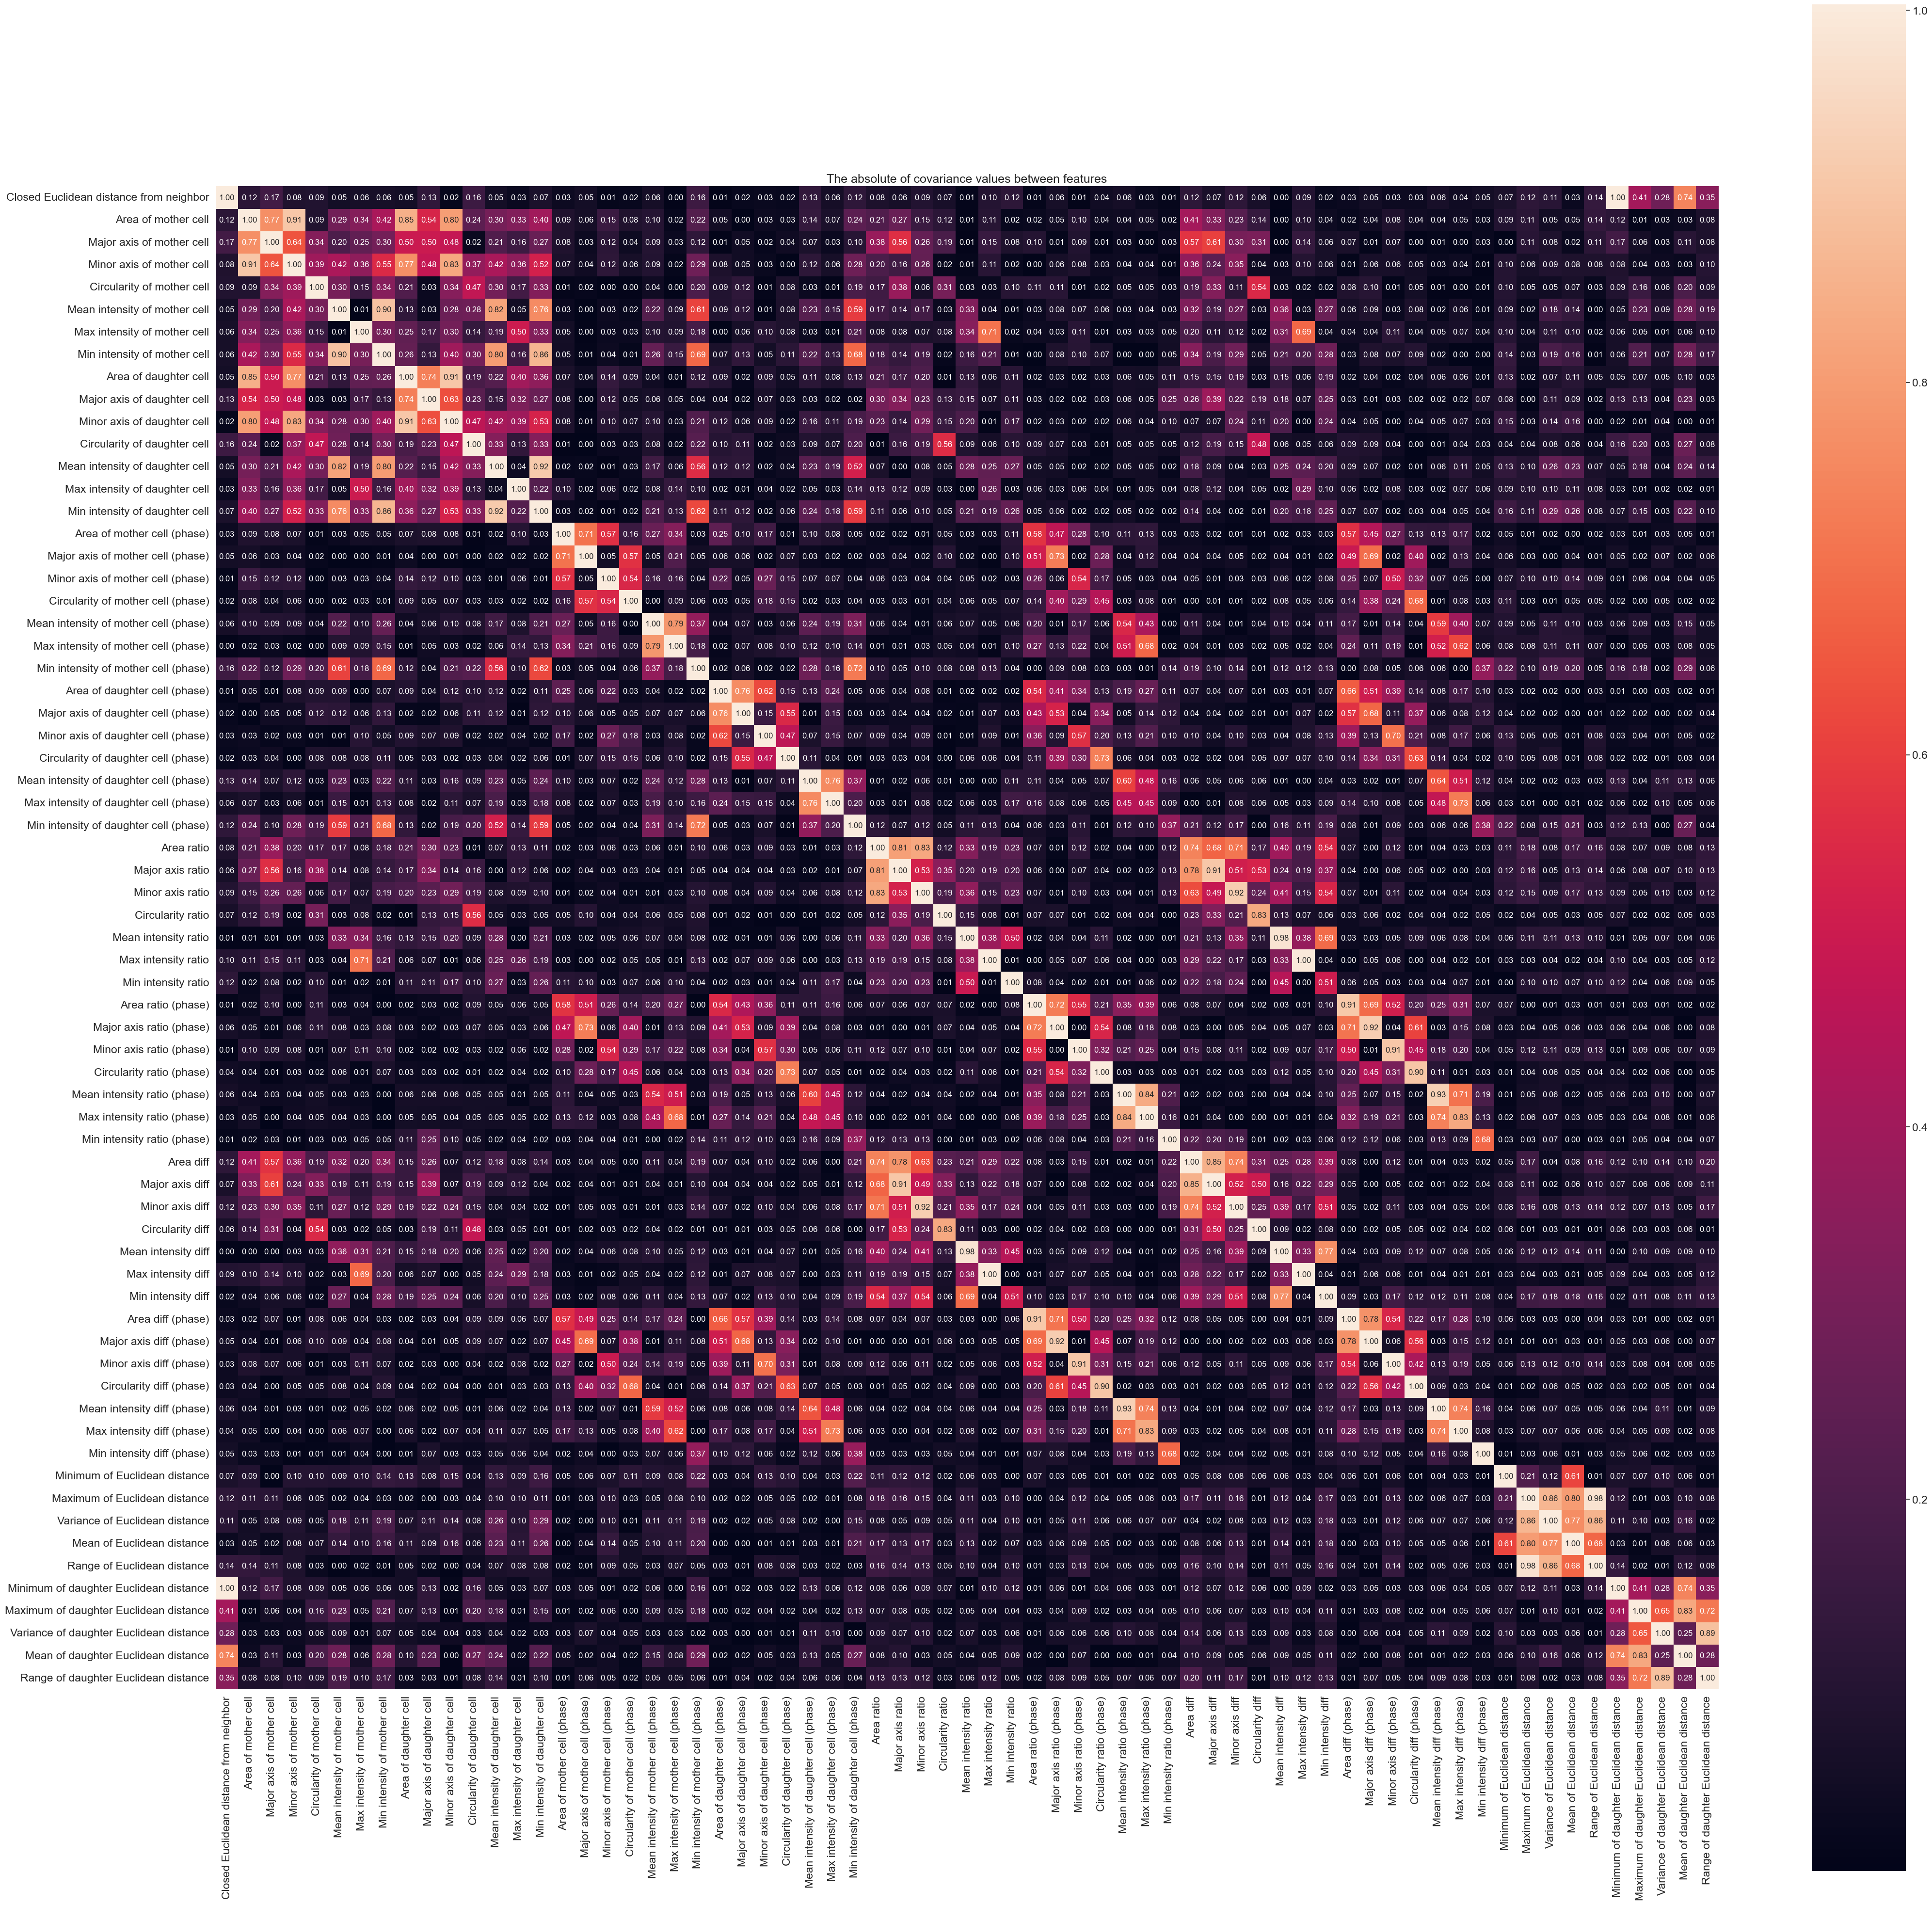

In [19]:
stdsc = StandardScaler()
X_std = stdsc.fit_transform(features_py)
cov_mat = np.cov(np.transpose(X_std))
cols = input_py.drop(columns = ['Label','Class']).columns
plt.figure(figsize=(50,50))
sns.set(font_scale=1.5)
hm = sns.heatmap(abs(cov_mat),
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('The absolute of covariance values between features')
plt.savefig('COV matrix.pdf')

In [20]:
cons_feature_py = input_py.drop(columns = ['Label','Class'])

In [21]:
# Intensity characteristic group
icg_features = cons_feature_py[cols[1:13]]
icg_cols = icg_features.columns
icg_features.head()

Area of mother cell  Major axis of mother cell  Minor axis of mother cell  \
0                  282                  30.086637                  14.839499   
1                  131                  14.747639                  12.895743   
2                  337                  21.602622                  20.035854   
3                  173                  15.791779                  14.391918   
4                  259                  22.150930                  14.941267   

   Circularity of mother cell  Mean intensity of mother cell  \
0                    0.869901                       0.671435   
1                    0.485156                       0.709226   
2                    0.373889                       0.609597   
3                    0.411621                       0.374222   
4                    0.738256                       0.343454   

   Max intensity of mother cell  Min intensity of mother cell  \
0                      0.763819                      0.518093   
1                      0.762881                      0.631514   
2                      0.986479                      0.112780   
3                      0.740900                      0.007546   
4                      0.850694                      0.033636   

   Area of daughter cell  Major axis of daughter cell  \
0                    625                    37.529135   
1                    132                    16.522120   
2                    376                    39.342817   
3                    201                    19.417690   
4                    116                    14.055735   

   Minor axis of daughter cell  Circularity of daughter cell  \
0                    25.682598                      0.729165   
1                    10.766760                      0.758514   
2                    15.121764                      0.923184   
3                    14.163892                      0.684053   
4                    10.823189                      0.638020   

   Mean intensity of daughter cell  
0                         0.670529  
1                         0.696193  
2                         0.485565  
3                         0.439479  
4                         0.414419

Text(0.5, 1.0, 'The absolute of covariance values between intensity characteristic features group')

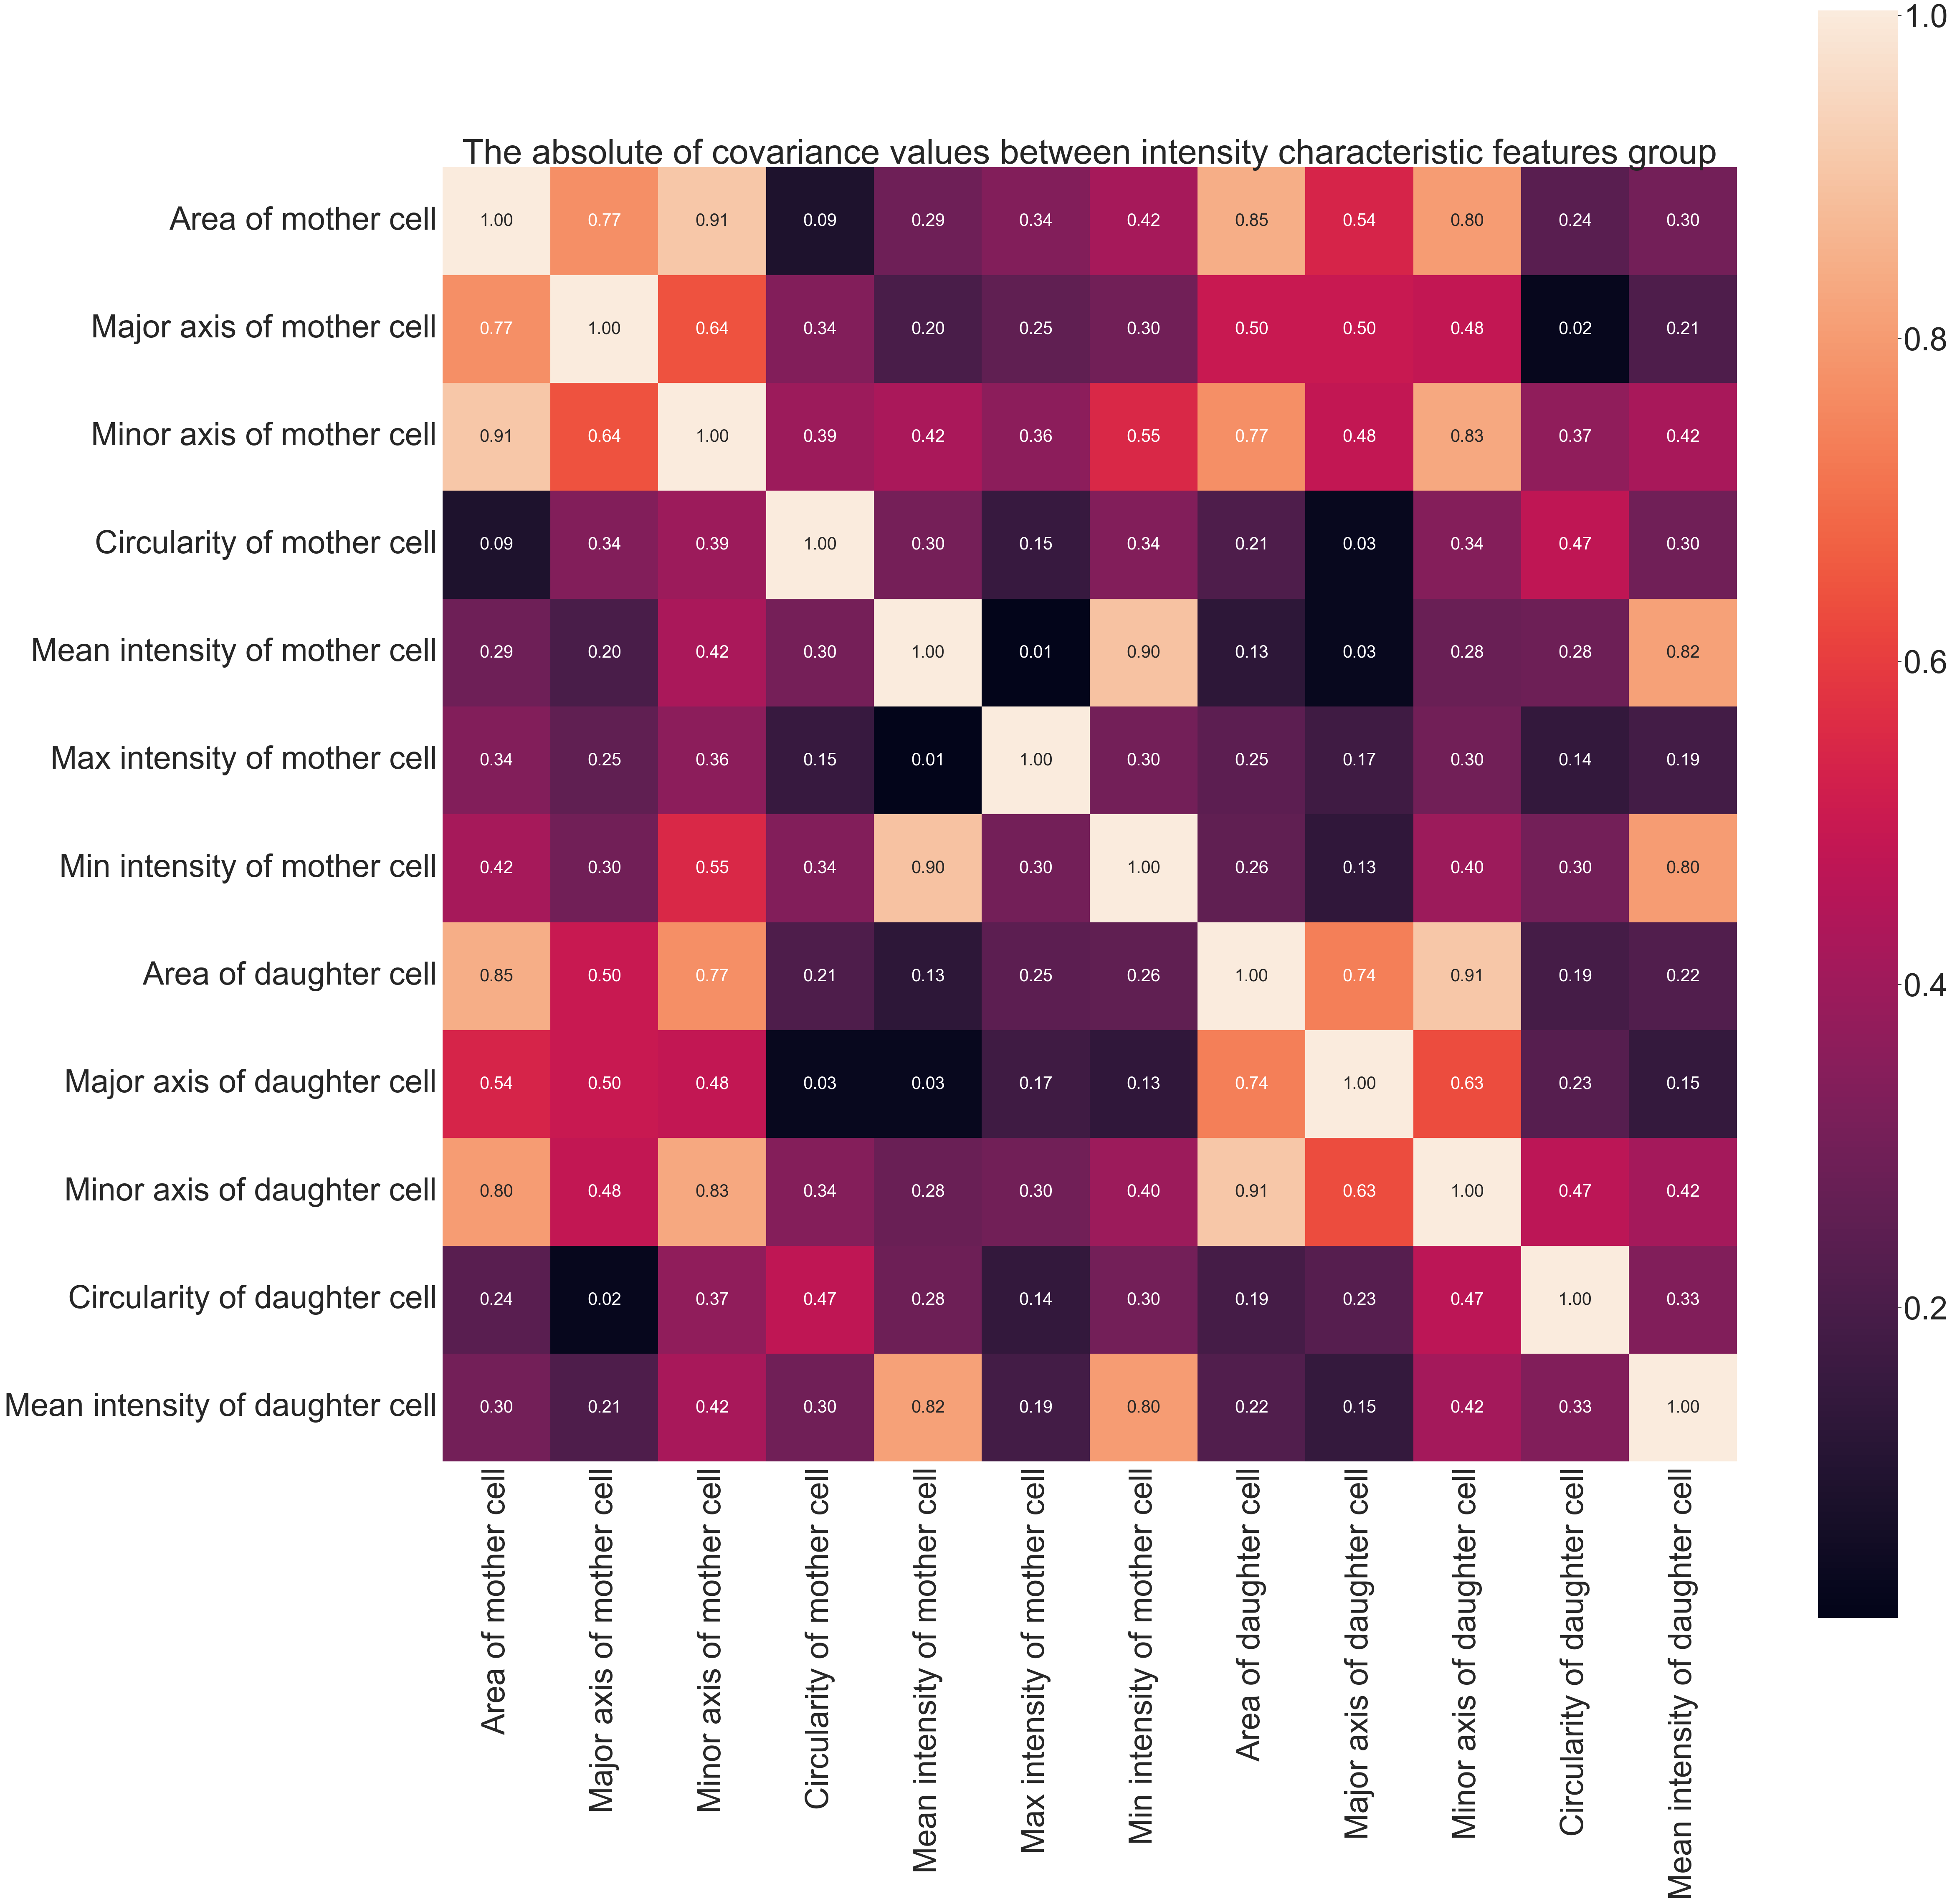

In [22]:
np_icg_features = icg_features.to_numpy()
icg_std = stdsc.fit_transform(np_icg_features)
cov_mat = np.cov(np.transpose(icg_std))
plt.figure(figsize=(50,50))
sns.set(font_scale=5)
hm_icg = sns.heatmap(abs(cov_mat),
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 30},
                 yticklabels=icg_cols,
                 xticklabels=icg_cols)
plt.title('The absolute of covariance values between intensity characteristic features group')

In [23]:
pd_for_pp = input_py[['Mean intensity of mother cell','Area of mother cell','Mean intensity diff','Class']]
pd_for_pp = pd_for_pp.rename(columns = {'Mean intensity of mother cell':'MIM','Area of mother cell':'AMC','Mean intensity diff'
                                       :'MID'})

<Figure size 3000x3000 with 0 Axes>

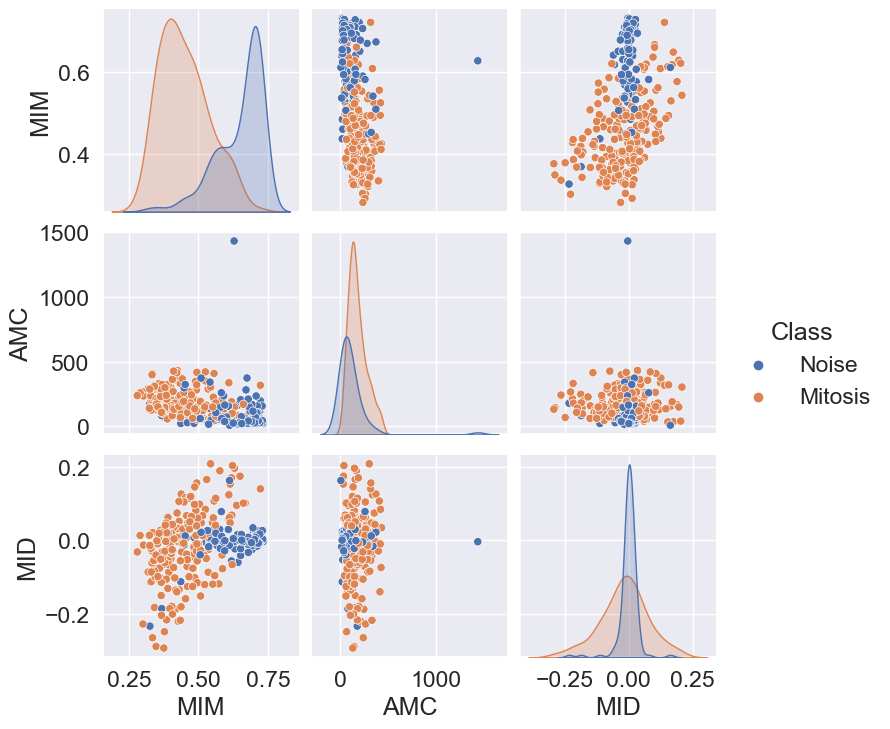

In [24]:
plt.figure(figsize=(30,30))
sns.set(font_scale=1.5)
sns.pairplot(pd_for_pp, hue = 'Class')

In [29]:
input_py.columns

Index(['Closed Euclidean distance from neighbor', 'Area of mother cell',
       'Major axis of mother cell', 'Minor axis of mother cell',
       'Circularity of mother cell', 'Mean intensity of mother cell',
       'Max intensity of mother cell', 'Min intensity of mother cell',
       'Area of daughter cell', 'Major axis of daughter cell',
       'Minor axis of daughter cell', 'Circularity of daughter cell',
       'Mean intensity of daughter cell', 'Max intensity of daughter cell',
       'Min intensity of daughter cell', 'Area of mother cell (phase)',
       'Major axis of mother cell (phase)',
       'Minor axis of mother cell (phase)',
       'Circularity of mother cell (phase)',
       'Mean intensity of mother cell (phase)',
       'Max intensity of mother cell (phase)',
       'Min intensity of mother cell (phase)', 'Area of daughter cell (phase)',
       'Major axis of daughter cell (phase)',
       'Minor axis of daughter cell (phase)',
       'Circularity of daughter cell (ph

In [27]:
pd_for_cont_f = input_py[['Range of daughter Euclidean distance','Range of circularity','Range of major axis','Class']]
pd_for_cont_f = pd_for_cont_f.rename(columns = {'Range of daughter Euclidean distance':'RdED','Range of circularity':'RC','Range of major axis'
                                       :'RMA'})

KeyError: "['Range of circularity', 'Range of major axis'] not in index"

In [28]:
pd_for_cont_f

NameError: name 'pd_for_cont_f' is not defined

In [ ]:
plt.figure(figsize=(30,30))
sns.set(font_scale=1.5)
sns.pairplot(pd_for_pp, hue = 'Class')